In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
# class target 0:red, 1:white
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()
# alcohol,sugar,pH값의 스케일이 다름->특성 표준화 사용

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
# 넘파이 배열로 바꾸기

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
data, target, test_size=0.2, random_state=42
)
# 훈련, 테스트 세트 나누기 test_size default = 25%

In [7]:
train_input.shape, test_input.shape
# 훈련세트 , 테스트세트 갯수 

((5197, 3), (1300, 3))

In [8]:
# 특성화 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
# 훈련세트 넣고 표준화
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
# train, test input 각각 특성 표준화하기

## 로지스틱 회귀

In [9]:
# 모델 훈련
from sklearn.linear_model import LogisticRegression
Ir = LogisticRegression()
Ir.fit(train_scaled, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# 성능 평가
Ir.score(train_scaled, train_target)
# 훈련 세트

0.7808350971714451

In [12]:
Ir.score(test_scaled, test_target)
# 테스트세트

0.7776923076923077

In [14]:
# 둘 다 점수가 낮으므로 과소적합, 훈련이 덜 됨
Ir.coef_, Ir.intercept_
# 각 칼럼 별 곱하는 계수, 절편

(array([[ 0.51270274,  1.6733911 , -0.68767781]]), array([1.81777902]))

In [15]:
(# alcoholX0.51270274+sugarX1.6733911+pHX-0.68767781)+1.81777902 
# 이 값이 0보다 크면 화이트 와인, 작으면 레드와인
# 알코올과 당도가 높을수록 화이트 와인일 가능성이 높고
# PH가 높을수록 레드와인 가능성 높음

SyntaxError: unexpected EOF while parsing (<ipython-input-15-da7a73766b51>, line 4)

## 결정트리
- scikit-learn의 결정 트리 알고리즘은 노드에서 최적의 분할을 찾기 전에 특성의 순서를 섞음(무작위성이 주입되므로 실행할 때마다 점수가 조금씩 달라짐
- 결정트리는 표준화 전처리 과정이 필요없음

In [17]:
# 모델 훈련
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [18]:
# 훈련세트 스코어
dt.score(train_scaled, train_target)

0.996921300750433

In [19]:
dt.score(test_scaled, test_target)

0.8592307692307692

In [20]:
# 훈련>테스트 이므로 과대적합

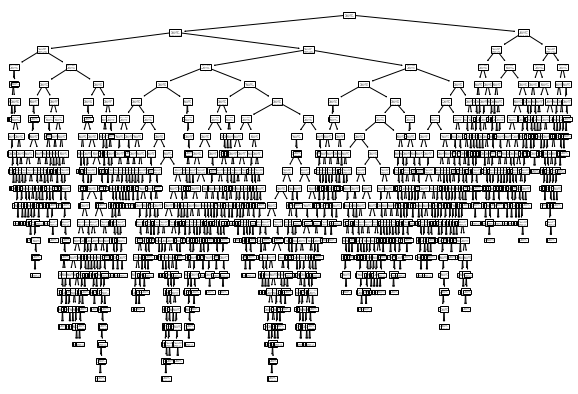

In [21]:
# 트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

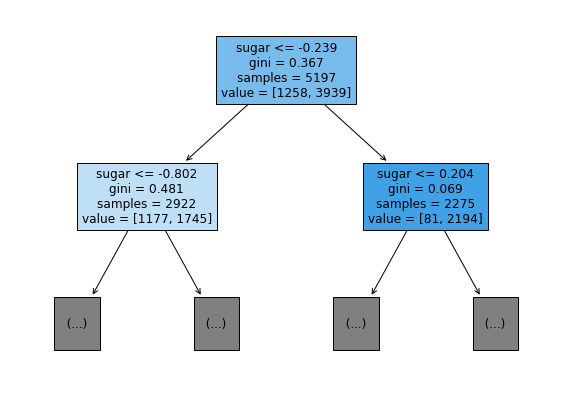

In [22]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()
# max_depth=1 루트노트 제외, 1개를 확장하여 그림, filled 루트 색칠, fearues_names 특성 이름 전달
# 왼쪽이 yes, 오른쪽 no, 
# gini 불순도, saples 총 샘플수, value 클래스 별 샘플 수 1258개는 레드와인 3939개는 화이트와인
# 노드의 색이 진해지면 어떤 클래스의 비율이 높음
# 리프노드 (맨 아래 끝에 달린 노드를 리프 노드라고 함)
# 리프노드에서 가장 많은 클래스가 예측 클래스가 됨(k-최근접 이웃과 비슷)
# 즉 왼쪽, 오른쪽 노드 총 샘플의 클래스는 모두 양의 클래스(화이트와인)로 예측됨
# 결정트리 회귀 문제이면 리프노드에 도달한 샘플의 타깃을 평균하여 예측값으로 사용

In [23]:
# gini 분순도는 무엇을 의미?
# 당도 -0.239 의 기준?
# criterion 매개변수에 지정한 지니불순도 사용, 1-(음성 클래스 비율^2+ 양성 클래스 비욜^^2)
# 노드에 하나의 클래스만 있다면 지니불순도는 0이 됨, 순수노드라고도 함
# 결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장 시킴 , 이 차이를 정보이득이라고 함
# criterion 매개변수는 gini, entropy 등이 있음, entropy는 제곱이 아닌 밑이 2인 로그를 곱함, 결과의 차이는 크지 않음 

In [24]:
# 훈련세트>테스트세트 과대적합은 트리가 무작정 자라났기 때문, 일반화가 잘 안되므로 가지치기가 필요
# 가지치기 방법은 트리 최대 깊이 지정

In [25]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [26]:
dt.score(train_scaled, train_target)

0.8454877814123533

In [27]:
dt.score(test_scaled, test_target)

0.8415384615384616

In [28]:
# 훈련세트 성능은 낮아졌지만 테스트 세트 성능은 그대로

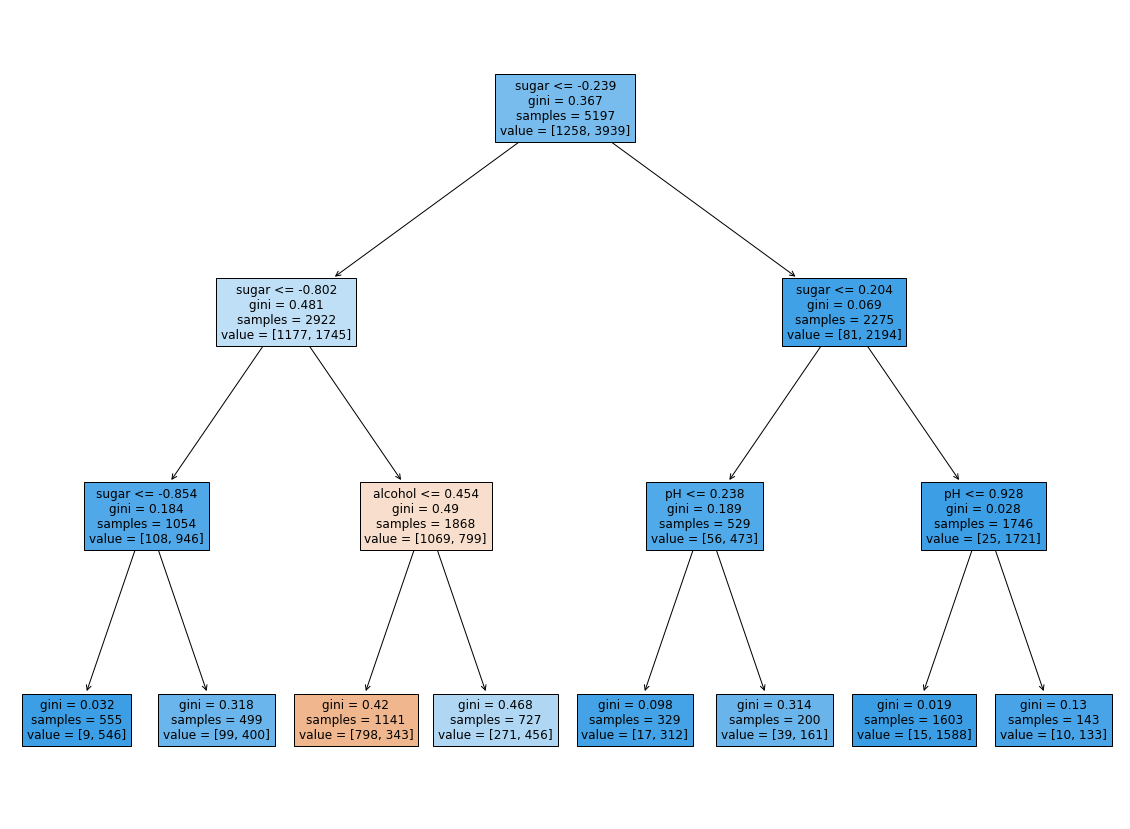

In [29]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [30]:
# 그렇다면 sugar, alcolhol, pH 등 테스트 조건을 결정하는 기준은 뭐지?

In [31]:
# 결정트리는 scaler가 필요없으므로 원 데이터로 다시 예측

In [33]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [34]:
dt.score(train_input, train_target)

0.8454877814123533

In [35]:
dt.score(test_input, test_target)
# 훈련, 테스트 성능 점수는 똑같음

0.8415384615384616

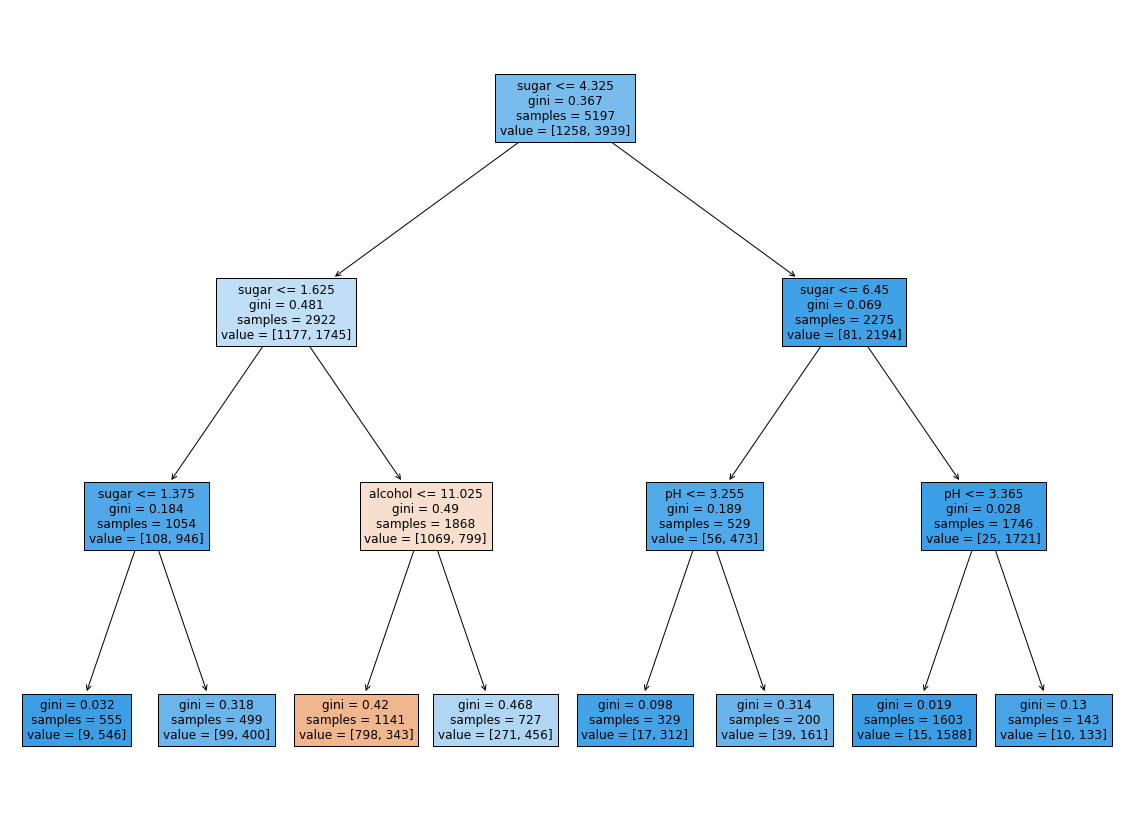

In [36]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [37]:
# 테스트 조건의 수가 scale 이전 값으로 바뀐 걸 알 수 있어 훨씬 이해하기 편함
# 왼쪽 세번째 리프노드만 레드와인으로 예측 나머지는 화이트 와인


## 특성 중요도
- 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해줌 

In [38]:
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

In [39]:
# 두번째 특성인 당도가 0.87로 가장 높음, 그다음 알콜, pH
# 특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산함
# 특성 중요도를 활용하면 결정트리 모델을 특성 선택에 활용할 수 있음
# 머신러닝 모델은 종종 블랙박스와 같다고 하지만 결정트리는 비전문가에게도 설명하기 쉬운 모델
# 결정 트리는 많은 앙상블 학습 알고리즘의 기반이 됨
# 앙상블 학습은 신경망과 함께 가장 높은 성능을 내서 인기 높은 알고리즘임

## 예제

In [40]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
# min_impurity_decrease어떤 노드의 정보이득 x(노드의 샘플 수) / (전체 샘플 수)값이 이 매개변수보다 작으면 더 이상 분할하지 않음
# min_impurity_decrease최소 불순도

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [41]:
dt.score(train_input, train_target)

0.8874350586877044

In [42]:
dt.score(test_input, test_target)

0.8615384615384616

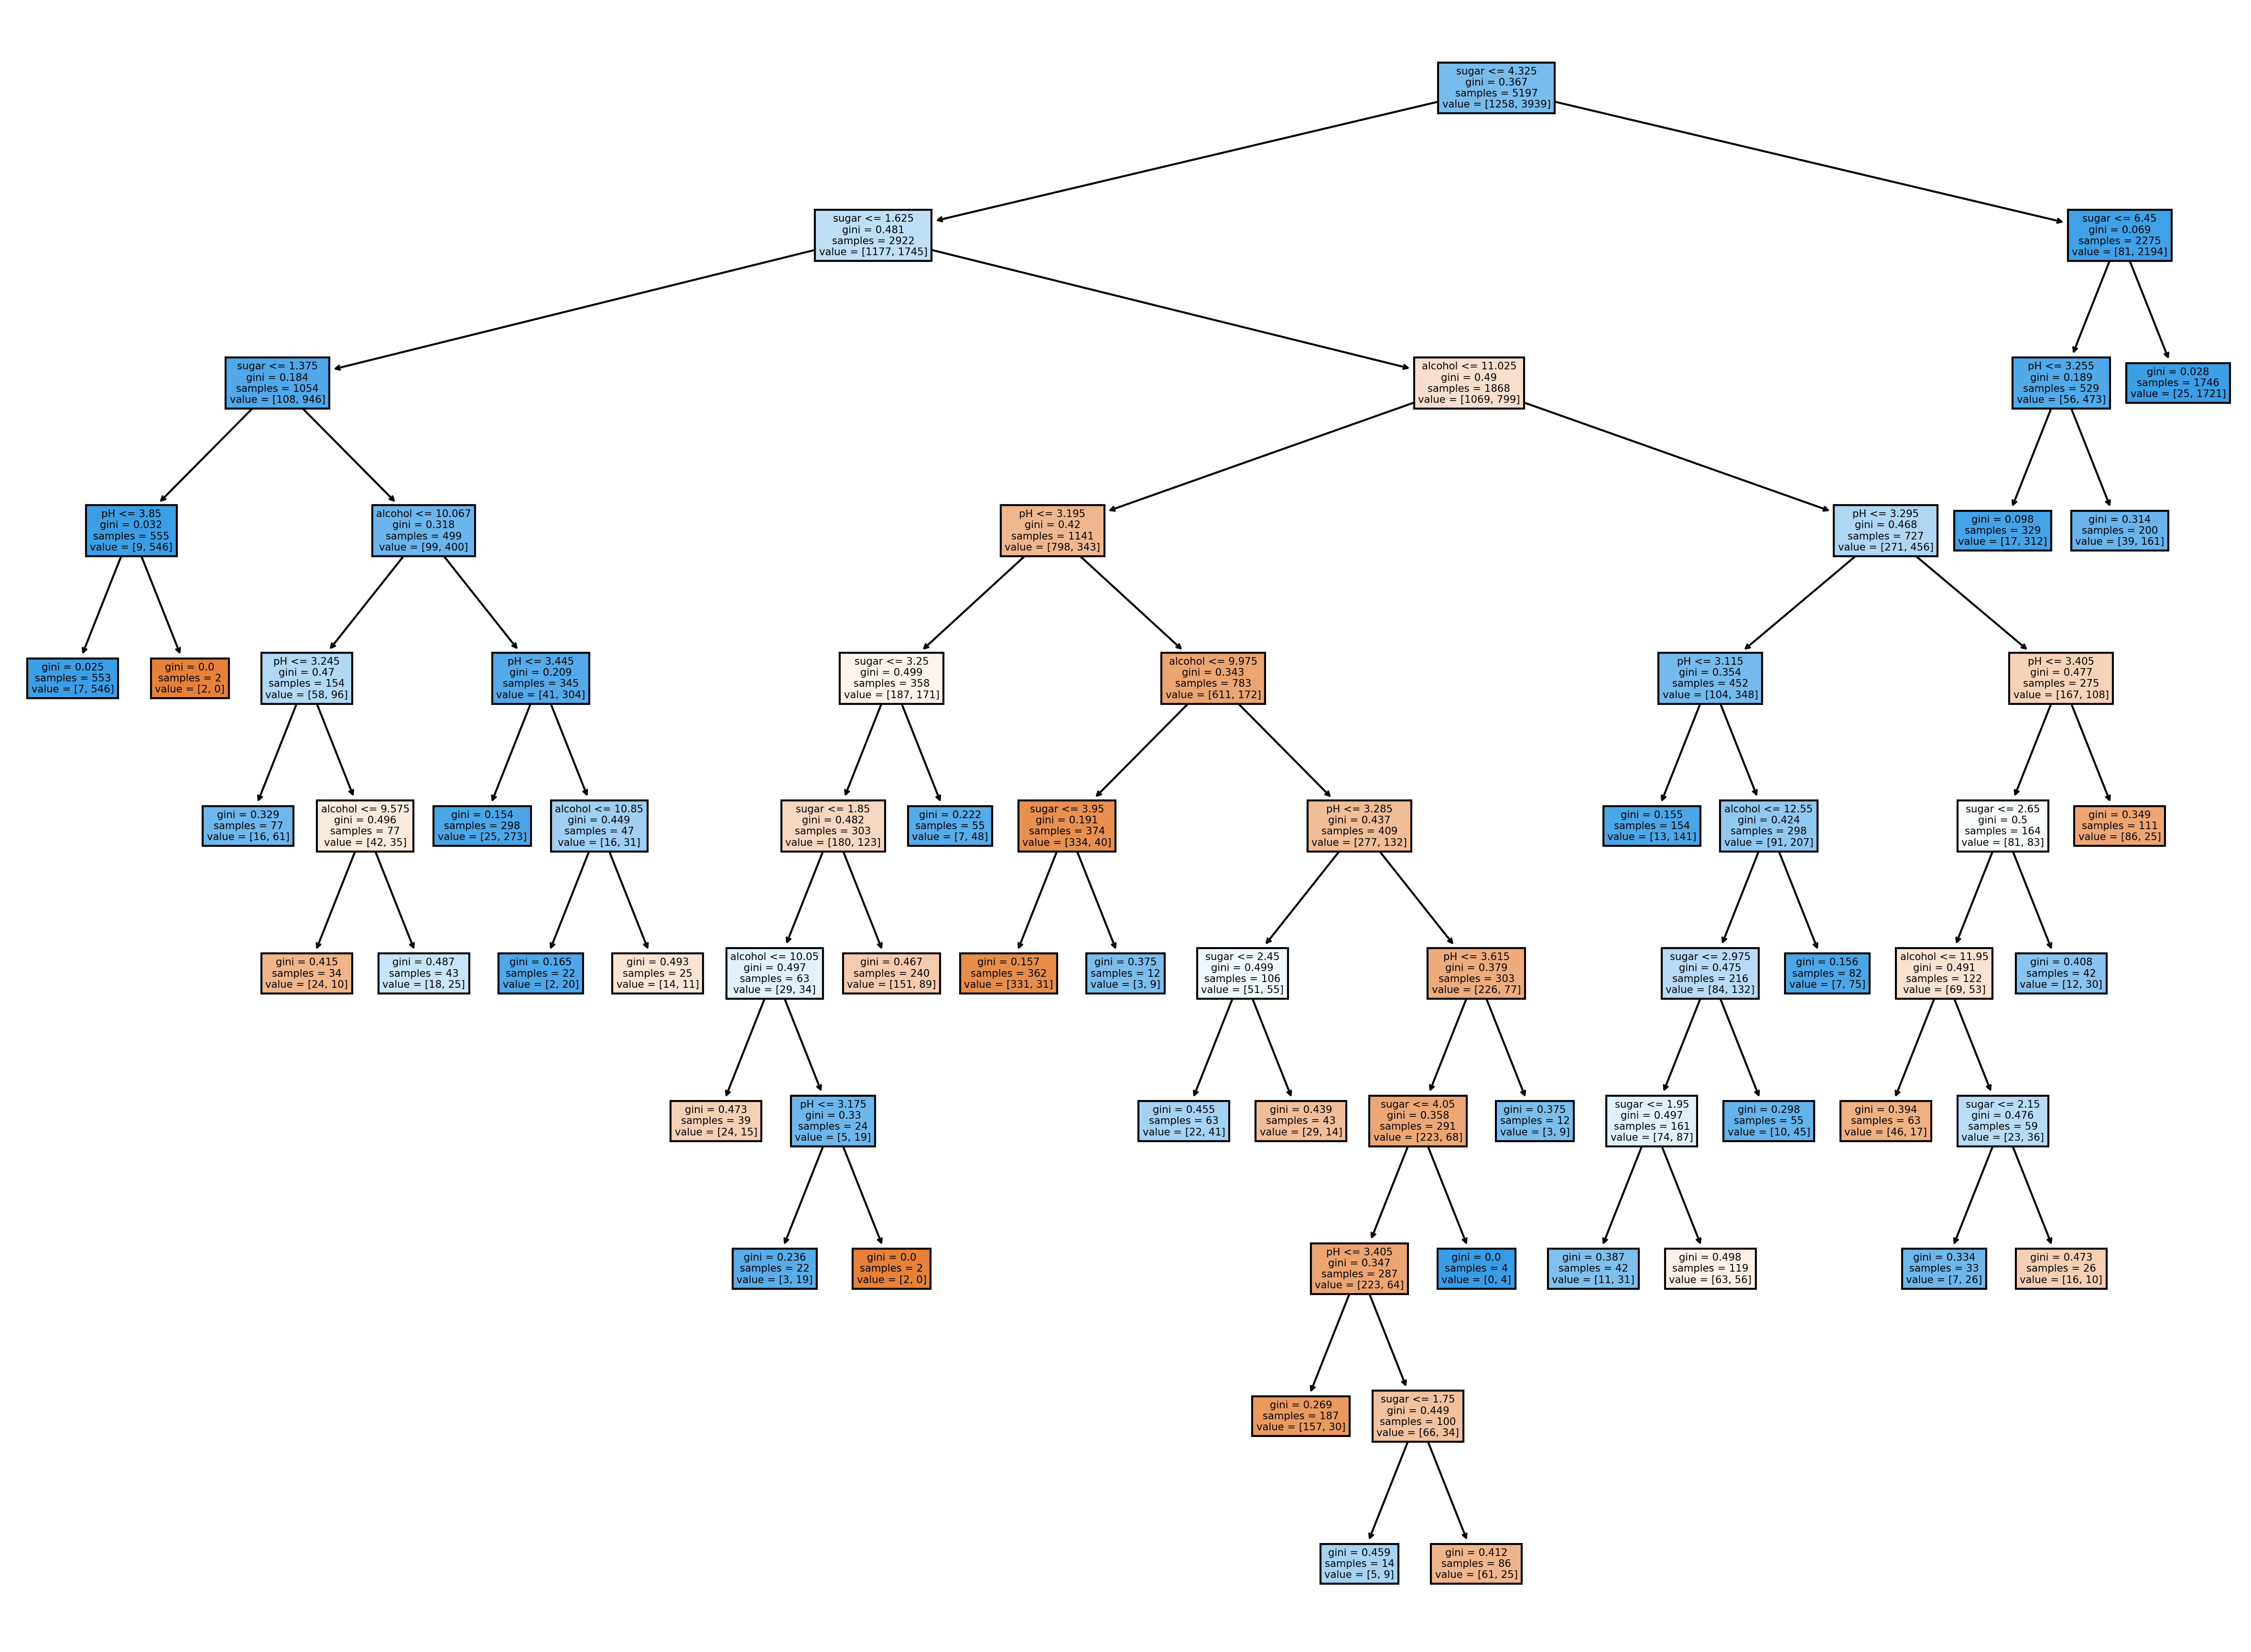

In [43]:
plt.figure(figsize=(20,15), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 좌우가 균일하지 않은 트리가 만들어짐, 테스트 세트 성능이 좀 더 높음